In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preprocessing

In [45]:
df = pd.read_csv('corona_dataset.csv')
df.head()

,people_ID,Region,Gender,Designation,Name,Married,Children,Occupation,Mode_transport,cases/1M,...,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1,Bhubaneshwar,Female,Mrs,mansi,YES,1.0,Farmer,Public,2,...,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.135010
1,2,Bhubaneshwar,Female,Mrs,riya masi,YES,2.0,Farmer,Walk,2,...,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.147880
2,3,Bhubaneshwar,Female,Mrs,sunita,NO,1.0,Cleaner,Public,2,...,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.224000
3,4,Bhubaneshwar,Female,Mrs,anjali @ babli,YES,1.0,Driver,Car,2,...,167.0,275.0,64.0,60.0,27,7,700000.0,2300000,1.0,48.779225
4,5,Bhubaneshwar,Female,Mrs,champa karketta,NO,2.0,Manufacturing,Car,2,...,153.0,331.0,71.0,64.0,32,7,3200000.0,1100000,1.0,87.868800


In [6]:
df.info()
cds_1=df.drop(['people_ID','Name','Designation'],axis=1)
d=cds_1.columns.groupby(cds_1.dtypes=='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 28 columns):
people_ID                 10714 non-null int64
Region                    10714 non-null object
Gender                    10714 non-null object
Designation               10714 non-null object
Name                      10694 non-null object
Married                   10714 non-null object
Children                  10403 non-null float64
Occupation                9967 non-null object
Mode_transport            10711 non-null object
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
comorbidity               10488 non-null object
Age                       10714 non-null int64
Coma score                10714 non-null int64
Pulmonary score           10714 non-null object
cardiological pressure    10617 non-null object
Diuresis                  9998 non-null float64
Platelets                 9790 non-null float64
HBB                       10698 

In [47]:
d[True]

Index(['Region', 'Gender', 'Married', 'Occupation', 'Mode_transport',
       'comorbidity', 'Pulmonary score', 'cardiological pressure'],
      dtype='object')

In [48]:
cds_cat=cds_1[d[True]]
cds_num=cds_1[d[False]]

In [8]:
cds_cat.head(3)

,Region,Gender,Married,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
0,Bhubaneshwar,Female,YES,Farmer,Public,Hypertension,<400,Normal
1,Bhubaneshwar,Female,YES,Farmer,Walk,Diabetes,<100,Stage-02
2,Bhubaneshwar,Female,NO,Cleaner,Public,None,<300,Elevated


In [10]:
cds_num.head(3)

,Children,cases/1M,Deaths/1M,Age,Coma score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,Insurance,salary,FT/month,Infect_Prob
0,1.0,2,0,68,8,441.0,154.0,93.0,233.0,82.0,58.0,27,7,3600000.0,1300000,2.0,49.13501
1,2.0,2,0,64,15,NaN,121.0,56.0,328.0,89.0,68.0,5,6,1600000.0,400000,1.0,51.14788
2,1.0,2,0,19,13,416.0,124.0,137.0,213.0,77.0,43.0,40,6,3400000.0,900000,1.0,73.22400


In [53]:
y=cds_num['Infect_Prob']
cds_num.drop('Infect_Prob',axis=1,inplace=True)
cds_num.isnull().sum()

C:\Users\Arjun\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Children            311
cases/1M              0
Deaths/1M             0
Age                   0
Coma score            0
Diuresis            716
Platelets           924
HBB                  16
d-dimer            1114
Heart rate         1114
HDL cholesterol      35
Charlson Index        0
Blood Glucose         0
Insurance          1090
salary                0
FT/month            723
dtype: int64

In [54]:
for i in cds_num.columns:
    if cds_num[i].isnull().sum()!=0:
      cds_num[i].fillna(cds_num[i].mean(),inplace=True)
cds_num.info()

C:\Users\Arjun\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 16 columns):
Children           10714 non-null float64
cases/1M           10714 non-null int64
Deaths/1M          10714 non-null int64
Age                10714 non-null int64
Coma score         10714 non-null int64
Diuresis           10714 non-null float64
Platelets          10714 non-null float64
HBB                10714 non-null float64
d-dimer            10714 non-null float64
Heart rate         10714 non-null float64
HDL cholesterol    10714 non-null float64
Charlson Index     10714 non-null int64
Blood Glucose      10714 non-null int64
Insurance          10714 non-null float64
salary             10714 non-null int64
FT/month           10714 non-null float64
dtypes: float64(9), int64(7)
memory usage: 1.3 MB


In [55]:
for i in cds_num.columns:
    corr=np.corrcoef([cds_num[i],df['Infect_Prob']])
    if corr[0,1]>0:
     print(i,corr[0,1])

Children 0.21097721597810962
cases/1M 0.1728710340127042
Deaths/1M 0.174993986673568
Coma score 0.038399722682842675
Diuresis 0.006850547022563493
Platelets 0.06628937609009387
HBB 0.019360270014016884
d-dimer 0.021130191465612628
HDL cholesterol 0.01328421539042629
Insurance 0.008488935464513235


In [56]:
cds_num_final=cds_num[['cases/1M','Deaths/1M','Coma score','Platelets','HBB','d-dimer','HDL cholesterol','Children']]
cds_num_final.head(3)

,cases/1M,Deaths/1M,Coma score,Platelets,HBB,d-dimer,HDL cholesterol,Children
0,2,0,8,154.0,93.0,233.0,58.0,1.0
1,2,0,15,121.0,56.0,328.0,68.0,2.0
2,2,0,13,124.0,137.0,213.0,43.0,1.0


In [57]:
cds_cat.head(4)

,Region,Gender,Married,Occupation,Mode_transport,comorbidity,Pulmonary score,cardiological pressure
0,Bhubaneshwar,Female,YES,Farmer,Public,Hypertension,<400,Normal
1,Bhubaneshwar,Female,YES,Farmer,Walk,Diabetes,<100,Stage-02
2,Bhubaneshwar,Female,NO,Cleaner,Public,None,<300,Elevated
3,Bhubaneshwar,Female,YES,Driver,Car,Coronary Heart Disease,<200,Stage-01


In [58]:
cds_cat.isnull().sum()

Region                      0
Gender                      0
Married                     0
Occupation                747
Mode_transport              3
comorbidity               226
Pulmonary score             0
cardiological pressure     97
dtype: int64

In [59]:
for i in ['Occupation','Mode_transport','comorbidity','cardiological pressure']:
      cds_cat[i].fillna(cds_c[i].mode()[0],inplace=True)

C:\Users\Arjun\Anaconda3\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [60]:
region_enc=pd.get_dummies(cds_cat.Region)
occ_enc=pd.get_dummies(cds_cat.Occupation)
mt_enc=pd.get_dummies(cds_cat.Mode_transport)
com_enc=pd.get_dummies(cds_cat.comorbidity)
cp_enc=pd.get_dummies(cds_cat['cardiological pressure'])
from sklearn.preprocessing import LabelEncoder 
enc=LabelEncoder()
cds_cat['gen_enc']=enc.fit_transform(cds_cat.Gender)
cds_cat['mar_enc']=enc.fit_transform(cds_cat.Married)
cdcat_final=pd.concat([region_enc,occ_enc,mt_enc,com_enc,cp_enc,cds_cat['gen_enc'],cds_cat['mar_enc']],axis=1)
cdcat_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 27 columns):
Bengaluru                 10714 non-null uint8
Bhubaneshwar              10714 non-null uint8
Chandigarh                10714 non-null uint8
Chennai                   10714 non-null uint8
Delhi                     10714 non-null uint8
Business                  10714 non-null uint8
Cleaner                   10714 non-null uint8
Clerk                     10714 non-null uint8
Driver                    10714 non-null uint8
Farmer                    10714 non-null uint8
Legal                     10714 non-null uint8
Manufacturing             10714 non-null uint8
Researcher                10714 non-null uint8
Sales                     10714 non-null uint8
Car                       10714 non-null uint8
Public                    10714 non-null uint8
Walk                      10714 non-null uint8
Coronary Heart Disease    10714 non-null uint8
Diabetes                  10714 non-null uint

C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Arjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
cds=pd.concat([cds_num_final,cdcat_final],axis=1)

In [62]:
cds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10714 entries, 0 to 10713
Data columns (total 35 columns):
cases/1M                  10714 non-null int64
Deaths/1M                 10714 non-null int64
Coma score                10714 non-null int64
Platelets                 10714 non-null float64
HBB                       10714 non-null float64
d-dimer                   10714 non-null float64
HDL cholesterol           10714 non-null float64
Children                  10714 non-null float64
Bengaluru                 10714 non-null uint8
Bhubaneshwar              10714 non-null uint8
Chandigarh                10714 non-null uint8
Chennai                   10714 non-null uint8
Delhi                     10714 non-null uint8
Business                  10714 non-null uint8
Cleaner                   10714 non-null uint8
Clerk                     10714 non-null uint8
Driver                    10714 non-null uint8
Farmer                    10714 non-null uint8
Legal                     10714 non

In [63]:
""" separating features and target """

Y = y
X = cds

In [64]:
from sklearn.model_selection import train_test_split

train_X,test_X,train_Y,test_Y = train_test_split(X,Y)

print("Training Size : ",train_X.shape)
print("Testing Size : ",test_X.shape)

Training Size :  (8035, 35)
Testing Size :  (2679, 35)


### Regression to predict the probability of Corona Infection

In [65]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [66]:
""" regression works with numeric values,
make sure you map all the string values in the data to some numeric value if required
"""

regressor.fit(train_X,train_Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

### Performance evaluation

In [67]:
""" complete the function RMSE 
    
    The Root Mean Square Error is defined in the following way
    sqrt(summation((y_pred[i]-y_true[i])^2)/N)
    where:
         i varies from 0 to N
         
    (use numpy)     

"""

def RMSE(y_pred,y_true):
    
    rmse = 0.0
    y_sub=y_pred-y_true
    y_2=y_sub**2
    se=y_2.sum()
    mse=se/len(y_2)
    rmse=np.sqrt(mse)
    return rmse
    
    

y_pred = regressor.predict(test_X)
print(type(y_pred),type(test_Y))

print("Root Mean Square Error = ",RMSE(y_pred,np.array(test_Y)))

<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
Root Mean Square Error =  9.580410557547149


In [278]:
inf_g=infect.groupby('Occupation')
ndf=pd.concat([cds_cat['Occupation'],df['Infect_Prob']],axis=1)
ndf=ndf[ndf['Infect_Prob']>50]
p=ndf.groupby('Occupation')
occ=pd.Series(p.count().index)
freq=pd.Series(np.array(p.count().Infect_Prob))
j=pd.concat([occ,freq],axis=1,ignore_index=True,sort=True)

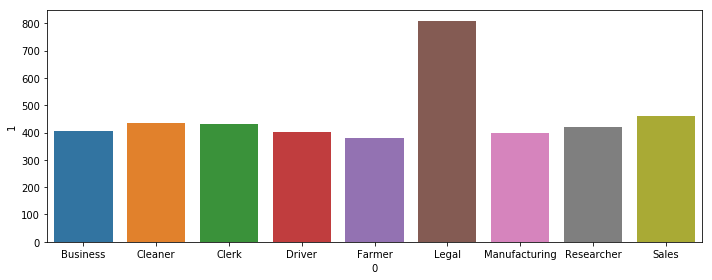

In [277]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.barplot(x=0,y=1,data=j)
plt.tight_layout()
plt.show()

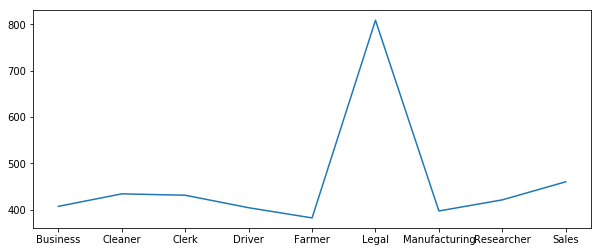

In [279]:
plt.figure(figsize=(10,4))
plt.plot(p.count().index,np.array(p.count().Infect_Prob))
plt.show()

In [280]:
p.count()

,Infect_Prob
Occupation,
Business,407
Cleaner,434
Clerk,431
Driver,404
Farmer,382
Legal,809
Manufacturing,397
Researcher,421
Sales,460
